<a href="https://colab.research.google.com/github/lucascheng24/COMP4432ML-DataProduct-A_Million_News_Headlines/blob/main/analysis/analysis_tSEN_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import string
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
url = 'https://raw.githubusercontent.com/lucascheng24/COMP4432ML-DataProduct-A_Million_News_Headlines/main/raw_data/abcnews-date-text.csv'


df = pd.read_csv(url)

headlines = df['headline_text']

In [3]:
# Sample size
sampleSize = len(headlines) // 20   # 5%
analyze_random_state = 4432

print("sampleSize: ", sampleSize)

sampleSize:  62209


In [4]:
df = df.sample(n = sampleSize, random_state = analyze_random_state)

In [5]:
df.head()

,publish_date,headline_text
157663,20050415,govt urged to release sustainability grants
53129,20031104,whatmore names side for one dayers
946324,20150422,driverless cars adelaide trials closer accordi...
1062810,20161216,star wars quiz: test your knowledge of a galax...
210891,20060106,student success ascribed to support network


In [6]:
df = df.drop_duplicates('headline_text')
headlines = df['headline_text']

In [11]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return tokens

preprocessed_headlines = [preprocess(headline) for headline in headlines]

# Convert preprocessed_headlines to a NumPy array
preprocessed_headlines_np = np.array(preprocessed_headlines)

<ipython-input-12-ac350671b6be>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  preprocessed_headlines_np = np.array(preprocessed_headlines)


In [13]:
preprocessed_df = df
preprocessed_df['headline_text'] = preprocessed_headlines_np

In [14]:
stem = PorterStemmer()
def stemmer(txt_arr):
    return [stem.stem(w) for w in txt_arr]

lem = WordNetLemmatizer()
def lemma(txt_arr):
    return [lem.lemmatize(w) for w in txt_arr]

In [15]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
preprocessed_df

,publish_date,headline_text
157663,20050415,"[govt, urged, release, sustainability, grant]"
53129,20031104,"[whatmore, name, side, one, dayers]"
946324,20150422,"[driverless, car, adelaide, trial, closer, acc..."
1062810,20161216,"[star, war, quiz, test, knowledge, galaxy, far..."
210891,20060106,"[student, success, ascribed, support, network]"
...,...,...
1082965,20170523,"[former, world, champion, nicky, hayden, dy]"
465365,20090528,"[swine, flu, ship, quarantined]"
987189,20151021,"[disgraced, former, png, police, chief, geoffr..."
871078,20140501,"[diesel, rebate, cut, fear]"


In [16]:
preprocessed_df['headline_text'] = df['headline_text'].apply(lemma)
preprocessed_df['pos_tags'] = preprocessed_df['headline_text'].apply(lambda x: nltk.pos_tag(x))

In [17]:
preprocessed_df.head()

,publish_date,headline_text,pos_tags
157663,20050415,"[govt, urged, release, sustainability, grant]","[(govt, NN), (urged, VBD), (release, NN), (sus..."
53129,20031104,"[whatmore, name, side, one, dayers]","[(whatmore, NN), (name, NN), (side, NN), (one,..."
946324,20150422,"[driverless, car, adelaide, trial, closer, acc...","[(driverless, NN), (car, NN), (adelaide, IN), ..."
1062810,20161216,"[star, war, quiz, test, knowledge, galaxy, far...","[(star, JJ), (war, NN), (quiz, JJ), (test, NN)..."
210891,20060106,"[student, success, ascribed, support, network]","[(student, NN), (success, NN), (ascribed, VBD)..."


Feature Extraction/Vectorization

In [18]:
# create an instance of TfidfVectorizer with tf-idf;
tf = TfidfVectorizer(stop_words = 'english', use_idf = True, norm = 'l2', min_df=2, max_df=0.3)

# convert text to features
text_tokens_tfidf = tf.fit_transform([' '.join(x) for x in preprocessed_df['headline_text']])

# get feature names
feature_names = tf.get_feature_names_out()

# print the first several examples and the features
feature_matrix = pd.DataFrame(text_tokens_tfidf.toarray()[:10], columns = feature_names)

feature_matrix

,000,01,02,03,06,07,0702,09,10,100,...,zoe,zombie,zone,zoning,zoo,zookeeper,zoom,zuckerberg,zuma,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


K Means Clustering

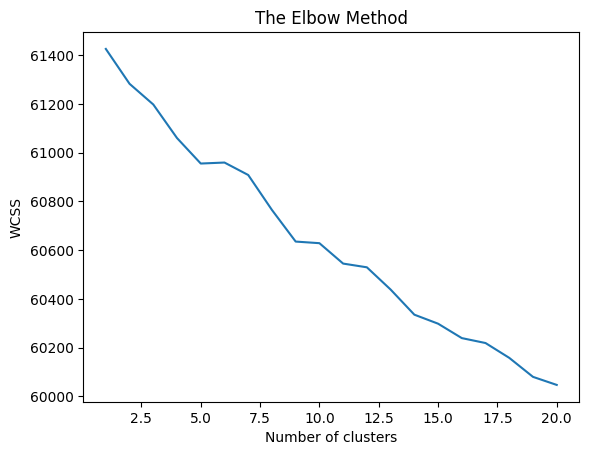

In [20]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(text_tokens_tfidf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.savefig('elbow.png')
plt.show()

Clustering Hierarchical

In [19]:
kMean = KMeans(n_clusters=10,)
kMean.fit(text_tokens_tfidf)

print("Top terms per cluster:")
common = kMean.cluster_centers_.argsort()[:, ::-1]
print(common)
terms = tf.get_feature_names_out()
for i in range(10):
    print("Cluster:",i),
    for ind in common[i, :50]:
        print(terms[ind])
    print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Top terms per cluster:
[[14103 11190  5908 ...  9670  9669     0]
 [ 9006  8272  2711 ...  9813  9812     0]
 [ 1219  5079  9498 ...  9444  9443     0]
 ...
 [ 7019  4972  8647 ...  9854  9853     0]
 [ 9196 14914  7733 ...  9341  9340     0]
 [12897  1053 14388 ...  9715  9714     0]]
Cluster: 0
urged
resident
govt
public
council
plan
flood
fight
farmer
help
water
home
care
warned
driver
change
bushfire
fund
caution
consider
say
rate
adopt
health
industry
seek
join
development
wind
housing
act
river
cut
government
alert
support
farm
regional
concern
hill
lake
rethink
stop
nursing
hospital
rise
fear
prepare
flooding
work


Cluster: 1
murder
man
charged
trial
guilty
accused
charge
police
attempted
court
woman
face
case
bail
double
pleads
stabbing
appeal
jailed
death
family
son
life
teen
sentence
victim
jury
reward
year
investigation
jail
verdict
husband
body
suspect
triple
mother
alleged
custody
bashing
sentenced
shooting
questioned
suspected
inquest
stand
conviction
cold
baby
retrial



In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# create a t-SNE plot for the clusters
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(text_tokens_tfidf.toarray())

# create a DataFrame with the t-SNE results and the cluster labels
df_tsne = pd.DataFrame(tsne_result, columns=['x', 'y'])
df_tsne['cluster'] = kMean.labels_

# plot the t-SNE results colored by cluster
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='x', y='y',
    hue='cluster',
    palette=sns.color_palette('hls', 10),
    data=df_tsne,
    legend='full',
    alpha=0.8
)
plt.title('t-SNE plot of clusters')
plt.show()